In [24]:
# Importing Libraries and Loading Data
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_excel('D:/Data Sci/Python/python_script/Financial Analytics/Marketing Campaign Analytics/CreditCardCampaign.xls')
print(data.shape)
data.columns

(10000, 8)


Index(['Lead', 'Gender', 'Country', 'Age', 'Dispatch Local Time',
       'On Mobile Device y/n', 'Travelled Abroad', 'Purchase y/n'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
Lead                    10000 non-null int64
Gender                  10000 non-null object
Country                 10000 non-null object
Age                     10000 non-null int64
Dispatch Local Time     10000 non-null object
On Mobile Device y/n    10000 non-null int64
Travelled Abroad        10000 non-null int64
Purchase y/n            10000 non-null int64
dtypes: int64(5), object(3)
memory usage: 625.1+ KB


In [26]:
data.isna().sum()

Lead                    0
Gender                  0
Country                 0
Age                     0
Dispatch Local Time     0
On Mobile Device y/n    0
Travelled Abroad        0
Purchase y/n            0
dtype: int64

In [27]:
# checking class Skewness in the 
data['Purchase y/n'].value_counts()

0    7963
1    2037
Name: Purchase y/n, dtype: int64

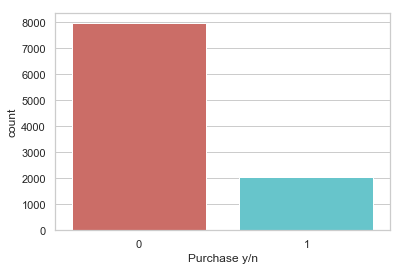

<Figure size 432x288 with 0 Axes>

In [28]:
sns.countplot(x = "Purchase y/n", data = data, palette = 'hls')
plt.show()
plt.savefig('count_plot')

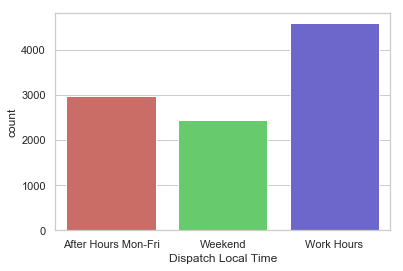

<Figure size 432x288 with 0 Axes>

In [29]:
sns.countplot(x = "Dispatch Local Time", data = data, palette = 'hls')
plt.show()
plt.savefig('Dispatch Local Time')

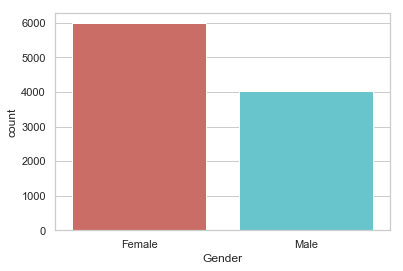

<Figure size 432x288 with 0 Axes>

In [30]:
sns.countplot(x = 'Gender', data = data, palette = 'hls')
plt.show()
plt.savefig('Gender')

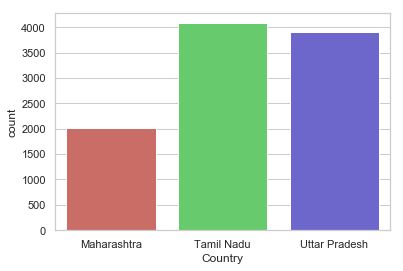

<Figure size 432x288 with 0 Axes>

In [31]:
sns.countplot(x = 'Country', data = data, palette = 'hls')
plt.show()
plt.savefig('Country')

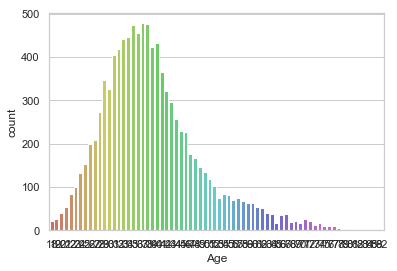

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x = 'Age', data = data, palette = 'hls')
plt.show()
plt.savefig('Age')

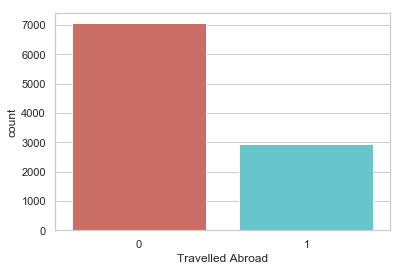

<Figure size 432x288 with 0 Axes>

In [32]:
sns.countplot(x = 'Travelled Abroad', data = data, palette = 'hls')
plt.show()
plt.savefig('Travelled Abroad')

In [33]:
#ax = data.hist(figsize=(50,50))

In [34]:
# distingishing Numerical & Categorical features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
print(numeric_features)
categorical_features = data.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['Lead', 'Age', 'On Mobile Device y/n', 'Travelled Abroad',
       'Purchase y/n'],
      dtype='object')
Index(['Gender', 'Country', 'Dispatch Local Time'], dtype='object')


In [35]:
# using pandas get_dummies (OHE) to convert all categorical variable.
dummy_columns = pd.get_dummies(data[categorical_features])

In [36]:
# concat dummy_columns and train
# dropping 'AnimalType', 'breed_type','SexuponOutcome', 'top_colors'.
fdata = pd.concat([dummy_columns, data],axis=1)
fdata = fdata.drop(['Gender', 'Country', 'Dispatch Local Time'], axis=1)

In [37]:
# SMOTE for treating Class Skewness
X = fdata.loc[:, fdata.columns != 'Purchase y/n']
y = fdata.loc[:, fdata.columns == 'Purchase y/n']
from imblearn.over_sampling import SMOTE
s = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
s_data_X,s_data_y=s.fit_sample(X_train, y_train)
s_data_X = pd.DataFrame(data=s_data_X,columns=columns )
s_data_y= pd.DataFrame(data=s_data_y,columns=['Purchase y/n'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(s_data_X))
print("Number of no purchased in oversampled data",len(s_data_y[s_data_y['Purchase y/n']==0]))
print("Number of purchased",len(s_data_y[s_data_y['Purchase y/n']==1]))
print("Proportion of no purchase data in oversampled data is ",len(s_data_y[s_data_y['Purchase y/n']==0])/len(s_data_X))
print("Proportion of purchased data in oversampled data is ",len(s_data_y[s_data_y['Purchase y/n']==1])/len(s_data_X))

length of oversampled data is  11190
Number of no purchased in oversampled data 5595
Number of purchased 5595
Proportion of no purchase data in oversampled data is  0.5
Proportion of purchased data in oversampled data is  0.5


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# Recursive Feature Elimination
'''It is based on the idea to repeatedly construct a model and choose either the
best or worst performing feature, setting the feature aside and then repeating
the process with the rest of the features. This process is applied until all 
features in the dataset are exhausted. The goal of RFE is to select features 
by recursively considering smaller and smaller sets of features.'''

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(s_data_X, s_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
# Implementing the Model
import statsmodels.api as sm
logit_model = sm.Logit(s_data_y,s_data_X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.325303
         Iterations 7
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.531    
Dependent Variable:         Purchase y/n             AIC:                      7304.2803
Date:                       2019-05-19 17:31         BIC:                      7392.1537
No. Observations:           11190                    Log-Likelihood:           -3640.1  
Df Model:                   11                       LL-Null:                  -7756.3  
Df Residuals:               11178                    LLR p-value:              0.0000   
Converged:                  1.0000                   Scale:                    1.0000   
No. Iterations:             7.0000                                                      
----------------------------------------------------------------------------------------
                                         Coef

In [43]:
#Logistic Regression Model Fitting

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
# Predicting the test set results and calculating the accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [45]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2287   81]
 [ 448  184]]


In [46]:
'''Compute precision, recall, F-measure and support
To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its 
best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are 
equally important.

The support is the number of occurrences of each class in y_test.'''

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2368
           1       0.69      0.29      0.41       632

   micro avg       0.82      0.82      0.82      3000
   macro avg       0.77      0.63      0.65      3000
weighted avg       0.81      0.82      0.79      3000



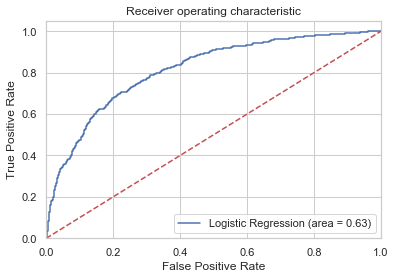

In [47]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

'''The receiver operating characteristic (ROC) curve is another common tool 
used with binary classifiers. The dotted line represents the ROC curve of a 
purely random classifier; a good classifier stays as far away from that line
as possible (toward the top-left corner).'''

# Decision Tree with Default Parameter

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
y_pred_train = logreg.predict(X_train)
pred = clf.predict(X_test)

In [62]:
import sklearn.metrics as sm
from sklearn.metrics import classification_report
print(sm.classification_report(y_test,pred))
print(sm.accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2368
           1       0.60      0.43      0.50       632

   micro avg       0.82      0.82      0.82      3000
   macro avg       0.73      0.67      0.69      3000
weighted avg       0.80      0.82      0.81      3000

0.819


In [63]:
print(sm.accuracy_score(y_test, pred))

0.819


In [65]:
df_eval = pd.DataFrame({'Model':[]
                        ,'Desc':[]
                        ,'Train Recall of (+ve) class':[]
                        ,'Train Recall of (-ve) class':[]
                        ,'Accuracy':[]
                        ,'Test Recall of (+ve) class':[]
                        ,'Test Recall of (-ve) class':[]                        
                        })

In [69]:
train_recall_pos = sm.recall_score(y_train, y_pred_train, pos_label=0)
train_recall_neg = sm.recall_score(y_train, y_pred_train, pos_label=1)
acc = sm.accuracy_score(y_train, y_pred_train)

test_recall_pos = sm.recall_score(y_test, pred, pos_label=0)
test_recall_neg = sm.recall_score(y_test, pred, pos_label=1)

row = df_eval.shape[0]
df_eval.loc[row] = ['Decision Tree', 'With max_depth = 10'
                    , train_recall_pos, train_recall_neg, acc, test_recall_pos, test_recall_neg]

In [70]:
df_eval

,Model,Desc,Train Recall of (+ve) class,Train Recall of (-ve) class,Accuracy,Test Recall of (+ve) class,Test Recall of (-ve) class
0,Decision Tree,With default parameters,0.959607,0.28968,0.825143,0.923986,0.425633
1,Decision Tree,With max_depth = 10,0.959607,0.28968,0.825143,0.923986,0.425633
2,Decision Tree,With max_depth = 10,0.959607,0.28968,0.825143,0.923986,0.425633


# Decision Tree with max_depth = 15

In [72]:
clf = DecisionTreeClassifier(max_depth=15)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
y_pred_train = logreg.predict(X_train)
pred = clf.predict(X_test)

In [76]:
print(sm.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2368
           1       0.49      0.45      0.47       632

   micro avg       0.79      0.79      0.79      3000
   macro avg       0.67      0.66      0.67      3000
weighted avg       0.78      0.79      0.78      3000



In [77]:
print(sm.accuracy_score(y_test, pred))

0.787


In [78]:
train_recall_pos = sm.recall_score(y_train, y_pred_train, pos_label=0)
train_recall_neg = sm.recall_score(y_train, y_pred_train, pos_label=1)
acc = sm.accuracy_score(y_train, y_pred_train)

test_recall_pos = sm.recall_score(y_test, pred, pos_label=0)
test_recall_neg = sm.recall_score(y_test, pred, pos_label=1)

row = df_eval.shape[0]
df_eval.loc[row] = ['Decision Tree', 'With max_depth = 15'
                    , train_recall_pos, train_recall_neg, acc, test_recall_pos, test_recall_neg]

In [79]:
df_eval

,Model,Desc,Train Recall of (+ve) class,Train Recall of (-ve) class,Accuracy,Test Recall of (+ve) class,Test Recall of (-ve) class
0,Decision Tree,With default parameters,0.959607,0.28968,0.825143,0.923986,0.425633
1,Decision Tree,With max_depth = 10,0.959607,0.28968,0.825143,0.923986,0.425633
2,Decision Tree,With max_depth = 10,0.959607,0.28968,0.825143,0.923986,0.425633
3,Decision Tree,With max_depth = 15,0.959607,0.28968,0.825143,0.877956,0.446203


# Decision Tree with max_depth = 4

In [81]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
y_pred_train = logreg.predict(X_train)

In [84]:
pred = clf.predict(X_test)

In [85]:
print(sm.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2368
           1       0.75      0.36      0.49       632

   micro avg       0.84      0.84      0.84      3000
   macro avg       0.80      0.66      0.70      3000
weighted avg       0.83      0.84      0.82      3000



In [86]:
print(sm.accuracy_score(y_test, pred))

0.8403333333333334


In [87]:
print(sm.confusion_matrix(y_test, pred))

[[2294   74]
 [ 405  227]]


In [88]:
train_recall_pos = sm.recall_score(y_train, y_pred_train, pos_label=0)
train_recall_neg = sm.recall_score(y_train, y_pred_train, pos_label=1)
acc = sm.accuracy_score(y_train, y_pred_train)

test_recall_pos = sm.recall_score(y_test, pred, pos_label=0)
test_recall_neg = sm.recall_score(y_test, pred, pos_label=1)

row = df_eval.shape[0]
df_eval.loc[row] = ['Decision Tree', 'With max_depth = 4'
                    , train_recall_pos, train_recall_neg, acc, test_recall_pos, test_recall_neg]

In [89]:
df_eval

,Model,Desc,Train Recall of (+ve) class,Train Recall of (-ve) class,Accuracy,Test Recall of (+ve) class,Test Recall of (-ve) class
0,Decision Tree,With default parameters,0.959607,0.28968,0.825143,0.923986,0.425633
1,Decision Tree,With max_depth = 10,0.959607,0.28968,0.825143,0.923986,0.425633
2,Decision Tree,With max_depth = 10,0.959607,0.28968,0.825143,0.923986,0.425633
3,Decision Tree,With max_depth = 15,0.959607,0.28968,0.825143,0.877956,0.446203
4,Decision Tree,With max_depth = 4,0.959607,0.28968,0.825143,0.968750,0.359177


# SVM SMOTE

In [92]:
from sklearn.svm import SVC,LinearSVC
clf = LinearSVC(class_weight='balanced',random_state=100,verbose=1)
clf.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)
pred = clf.predict(X_test)

train_recall_pos = sm.recall_score(y_train, y_pred_train, pos_label=0)
train_recall_neg = sm.recall_score(y_train, y_pred_train, pos_label=1)
acc = sm.accuracy_score(y_train, y_pred_train)

test_recall_pos = sm.recall_score(y_test, pred, pos_label=0)
test_recall_neg = sm.recall_score(y_test, pred, pos_label=1)

row = df_eval.shape[0]
df_eval.loc[row] = ['SVC', 'With default parameters'
                    , train_recall_pos, train_recall_neg, acc, test_recall_pos, test_recall_neg]

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [93]:
df_eval

,Model,Desc,Train Recall of (+ve) class,Train Recall of (-ve) class,Accuracy,Test Recall of (+ve) class,Test Recall of (-ve) class
0,Decision Tree,With default parameters,0.959607,0.28968,0.825143,0.923986,0.425633
1,Decision Tree,With max_depth = 10,0.959607,0.28968,0.825143,0.923986,0.425633
2,Decision Tree,With max_depth = 10,0.959607,0.28968,0.825143,0.923986,0.425633
3,Decision Tree,With max_depth = 15,0.959607,0.28968,0.825143,0.877956,0.446203
4,Decision Tree,With max_depth = 4,0.959607,0.28968,0.825143,0.968750,0.359177
5,SVC,With default parameters,0.959607,0.28968,0.825143,0.999578,0.004747


In [98]:
fdata.head(1)

,Gender_Female,Gender_Male,Country_Maharashtra,Country_Tamil Nadu,Country_Uttar Pradesh,Dispatch Local Time_After Hours Mon-Fri,Dispatch Local Time_Weekend,Dispatch Local Time_Work Hours,Lead,Age,On Mobile Device y/n,Travelled Abroad,Purchase y/n
0,1,0,1,0,0,1,0,0,1,39,1,1,0


In [107]:
X = fdata[['Age', 'On Mobile Device y/n', 'Gender_Female',
       'Gender_Male', 'Country_Maharashtra', 'Country_Tamil Nadu', 'Country_Uttar Pradesh',
       'Dispatch Local Time_After Hours Mon-Fri', 'Dispatch Local Time_Weekend', 'Dispatch Local Time_Work Hours']]

In [108]:
y = fdata['Purchase y/n']

In [109]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [110]:
# smote = SMOTE(random_state=100, sampling_strategy=0.4284)
smote = SMOTE(random_state=100, sampling_strategy=0.65)

In [111]:
y_train.value_counts()

0    5592
1    1408
Name: Purchase y/n, dtype: int64

In [112]:
y_train.value_counts()/len(y_train)

0    0.798857
1    0.201143
Name: Purchase y/n, dtype: float64

In [113]:
x_train, y_train = smote.fit_sample(x_train, y_train)

In [114]:
pd.Series(y_train).value_counts()

0    5592
1    3634
dtype: int64

In [115]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.606113
1    0.393887
dtype: float64

# SMOTE Logistic Regression with default parameters

In [116]:
logR = LogisticRegression().fit(x_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [117]:
y_pred_train = logR.predict(x_train)
pred = logR.predict(x_test)
print(sm.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2371
           1       0.51      0.59      0.55       629

   micro avg       0.80      0.80      0.80      3000
   macro avg       0.70      0.72      0.71      3000
weighted avg       0.81      0.80      0.80      3000



In [118]:
print(sm.accuracy_score(y_test, pred))

0.7973333333333333


In [119]:
print(sm.confusion_matrix(y_test, pred))

[[2020  351]
 [ 257  372]]


In [120]:
train_recall_pos = sm.recall_score(y_train, y_pred_train, pos_label=0)
train_recall_neg = sm.recall_score(y_train, y_pred_train, pos_label=1)
acc = sm.accuracy_score(y_train, y_pred_train)

test_recall_pos = sm.recall_score(y_test, pred, pos_label=0)
test_recall_neg = sm.recall_score(y_test, pred, pos_label=1)

row = df_eval.shape[0]
df_eval.loc[row] = ['Logistic Regression', 'SMOTE With default parameters'
                    , train_recall_pos, train_recall_neg, acc, test_recall_pos, test_recall_neg]

In [121]:
df_eval

,Model,Desc,Train Recall of (+ve) class,Train Recall of (-ve) class,Accuracy,Test Recall of (+ve) class,Test Recall of (-ve) class
0,Decision Tree,With default parameters,0.959607,0.289680,0.825143,0.923986,0.425633
1,Decision Tree,With max_depth = 10,0.959607,0.289680,0.825143,0.923986,0.425633
2,Decision Tree,With max_depth = 10,0.959607,0.289680,0.825143,0.923986,0.425633
3,Decision Tree,With max_depth = 15,0.959607,0.289680,0.825143,0.877956,0.446203
4,Decision Tree,With max_depth = 4,0.959607,0.289680,0.825143,0.968750,0.359177
5,SVC,With default parameters,0.959607,0.289680,0.825143,0.999578,0.004747
6,Logistic Regression,SMOTE With default parameters,0.848176,0.659329,0.773791,0.851961,0.591415


# SMOTE Decision Tree with default parameters

In [122]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred_train = logR.predict(x_train)
pred = clf.predict(x_test)
print(sm.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2371
           1       0.49      0.53      0.51       629

   micro avg       0.78      0.78      0.78      3000
   macro avg       0.68      0.69      0.68      3000
weighted avg       0.79      0.78      0.79      3000



In [124]:
print(sm.accuracy_score(y_test, pred))

0.7843333333333333


In [125]:
print(sm.confusion_matrix(y_test, pred))

[[2022  349]
 [ 298  331]]


In [126]:
train_recall_pos = sm.recall_score(y_train, y_pred_train, pos_label=0)
train_recall_neg = sm.recall_score(y_train, y_pred_train, pos_label=1)
acc = sm.accuracy_score(y_train, y_pred_train)

test_recall_pos = sm.recall_score(y_test, pred, pos_label=0)
test_recall_neg = sm.recall_score(y_test, pred, pos_label=1)

row = df_eval.shape[0]
df_eval.loc[row] = ['Decision Tree', 'SMOTE with default parameters'
                    , train_recall_pos, train_recall_neg, acc, test_recall_pos, test_recall_neg]

In [127]:
df_eval

,Model,Desc,Train Recall of (+ve) class,Train Recall of (-ve) class,Accuracy,Test Recall of (+ve) class,Test Recall of (-ve) class
0,Decision Tree,With default parameters,0.959607,0.289680,0.825143,0.923986,0.425633
1,Decision Tree,With max_depth = 10,0.959607,0.289680,0.825143,0.923986,0.425633
2,Decision Tree,With max_depth = 10,0.959607,0.289680,0.825143,0.923986,0.425633
3,Decision Tree,With max_depth = 15,0.959607,0.289680,0.825143,0.877956,0.446203
4,Decision Tree,With max_depth = 4,0.959607,0.289680,0.825143,0.968750,0.359177
5,SVC,With default parameters,0.959607,0.289680,0.825143,0.999578,0.004747
6,Logistic Regression,SMOTE With default parameters,0.848176,0.659329,0.773791,0.851961,0.591415
7,Decision Tree,SMOTE with default parameters,0.848176,0.659329,0.773791,0.852805,0.526232


# SOMTE Decision Tree with max_depth = 10

In [128]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(x_train, y_train)
y_pred_train = logR.predict(x_train)
pred = clf.predict(x_test)
print(sm.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2371
           1       0.49      0.54      0.51       629

   micro avg       0.79      0.79      0.79      3000
   macro avg       0.68      0.70      0.69      3000
weighted avg       0.79      0.79      0.79      3000



In [129]:
print(sm.accuracy_score(y_test, pred))

0.788


In [130]:
print(sm.confusion_matrix(y_test, pred))

[[2027  344]
 [ 292  337]]


In [131]:
train_recall_pos = sm.recall_score(y_train, y_pred_train, pos_label=0)
train_recall_neg = sm.recall_score(y_train, y_pred_train, pos_label=1)
acc = sm.accuracy_score(y_train, y_pred_train)

test_recall_pos = sm.recall_score(y_test, pred, pos_label=0)
test_recall_neg = sm.recall_score(y_test, pred, pos_label=1)

row = df_eval.shape[0]
df_eval.loc[row] = ['Decision Tree', 'SMOTE with max_depth = 10'
                    , train_recall_pos, train_recall_neg, acc, test_recall_pos, test_recall_neg]

In [132]:
df_eval

,Model,Desc,Train Recall of (+ve) class,Train Recall of (-ve) class,Accuracy,Test Recall of (+ve) class,Test Recall of (-ve) class
0,Decision Tree,With default parameters,0.959607,0.289680,0.825143,0.923986,0.425633
1,Decision Tree,With max_depth = 10,0.959607,0.289680,0.825143,0.923986,0.425633
2,Decision Tree,With max_depth = 10,0.959607,0.289680,0.825143,0.923986,0.425633
3,Decision Tree,With max_depth = 15,0.959607,0.289680,0.825143,0.877956,0.446203
4,Decision Tree,With max_depth = 4,0.959607,0.289680,0.825143,0.968750,0.359177
5,SVC,With default parameters,0.959607,0.289680,0.825143,0.999578,0.004747
6,Logistic Regression,SMOTE With default parameters,0.848176,0.659329,0.773791,0.851961,0.591415
7,Decision Tree,SMOTE with default parameters,0.848176,0.659329,0.773791,0.852805,0.526232
8,Decision Tree,SMOTE with max_depth = 10,0.848176,0.659329,0.773791,0.854914,0.535771


In [133]:
sm.roc_auc_score(y_test, pred)

0.6953423018870707

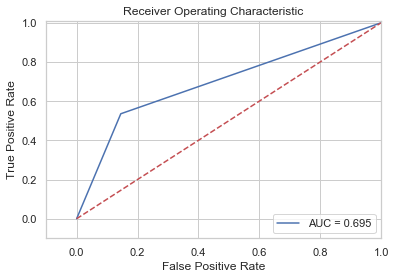

In [134]:
# from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = sm.roc_curve(y_test,pred)
roc_auc = sm.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SMOTE Decision Tree with max_depth =4

In [135]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)
y_pred_train = logR.predict(x_train)
pred = clf.predict(x_test)
print(sm.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2371
           1       0.57      0.55      0.56       629

   micro avg       0.82      0.82      0.82      3000
   macro avg       0.73      0.72      0.72      3000
weighted avg       0.82      0.82      0.82      3000



In [136]:
print(sm.accuracy_score(y_test, pred))

0.819


In [137]:
print(sm.confusion_matrix(y_test, pred))

[[2114  257]
 [ 286  343]]


In [138]:
train_recall_pos = sm.recall_score(y_train, y_pred_train, pos_label=0)
train_recall_neg = sm.recall_score(y_train, y_pred_train, pos_label=1)
acc = sm.accuracy_score(y_train, y_pred_train)

test_recall_pos = sm.recall_score(y_test, pred, pos_label=0)
test_recall_neg = sm.recall_score(y_test, pred, pos_label=1)

row = df_eval.shape[0]
df_eval.loc[row] = ['Decision Tree', 'SMOTE with max_depth = 4'
                    , train_recall_pos, train_recall_neg, acc, test_recall_pos, test_recall_neg]

In [139]:
df_eval

,Model,Desc,Train Recall of (+ve) class,Train Recall of (-ve) class,Accuracy,Test Recall of (+ve) class,Test Recall of (-ve) class
0,Decision Tree,With default parameters,0.959607,0.289680,0.825143,0.923986,0.425633
1,Decision Tree,With max_depth = 10,0.959607,0.289680,0.825143,0.923986,0.425633
2,Decision Tree,With max_depth = 10,0.959607,0.289680,0.825143,0.923986,0.425633
3,Decision Tree,With max_depth = 15,0.959607,0.289680,0.825143,0.877956,0.446203
4,Decision Tree,With max_depth = 4,0.959607,0.289680,0.825143,0.968750,0.359177
5,SVC,With default parameters,0.959607,0.289680,0.825143,0.999578,0.004747
6,Logistic Regression,SMOTE With default parameters,0.848176,0.659329,0.773791,0.851961,0.591415
7,Decision Tree,SMOTE with default parameters,0.848176,0.659329,0.773791,0.852805,0.526232
8,Decision Tree,SMOTE with max_depth = 10,0.848176,0.659329,0.773791,0.854914,0.535771
9,Decision Tree,SMOTE with max_depth = 4,0.848176,0.659329,0.773791,0.891607,0.545310


# SVM SMOTE

In [140]:
from sklearn.svm import SVC,LinearSVC
clf = LinearSVC(class_weight='balanced',random_state=100,verbose=1)
clf.fit(x_train,y_train)

y_pred_train = logR.predict(x_train)
pred = clf.predict(x_test)

train_recall_pos = sm.recall_score(y_train, y_pred_train, pos_label=0)
train_recall_neg = sm.recall_score(y_train, y_pred_train, pos_label=1)
acc = sm.accuracy_score(y_train, y_pred_train)

test_recall_pos = sm.recall_score(y_test, pred, pos_label=0)
test_recall_neg = sm.recall_score(y_test, pred, pos_label=1)

row = df_eval.shape[0]
df_eval.loc[row] = ['SVC', 'SMOTE with default parameters'
                    , train_recall_pos, train_recall_neg, acc, test_recall_pos, test_recall_neg]

[LibLinear]

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [141]:
df_eval

,Model,Desc,Train Recall of (+ve) class,Train Recall of (-ve) class,Accuracy,Test Recall of (+ve) class,Test Recall of (-ve) class
0,Decision Tree,With default parameters,0.959607,0.289680,0.825143,0.923986,0.425633
1,Decision Tree,With max_depth = 10,0.959607,0.289680,0.825143,0.923986,0.425633
2,Decision Tree,With max_depth = 10,0.959607,0.289680,0.825143,0.923986,0.425633
3,Decision Tree,With max_depth = 15,0.959607,0.289680,0.825143,0.877956,0.446203
4,Decision Tree,With max_depth = 4,0.959607,0.289680,0.825143,0.968750,0.359177
5,SVC,With default parameters,0.959607,0.289680,0.825143,0.999578,0.004747
6,Logistic Regression,SMOTE With default parameters,0.848176,0.659329,0.773791,0.851961,0.591415
7,Decision Tree,SMOTE with default parameters,0.848176,0.659329,0.773791,0.852805,0.526232
8,Decision Tree,SMOTE with max_depth = 10,0.848176,0.659329,0.773791,0.854914,0.535771
9,Decision Tree,SMOTE with max_depth = 4,0.848176,0.659329,0.773791,0.891607,0.545310


In [142]:
print(LinearSVC())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [143]:
logR = LogisticRegression().fit(X, y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [165]:
pred_prob = logR.predict_proba(X)

In [166]:
prob = pred_prob[:,1]

In [167]:
proba = sorted(prob, reverse=True)

In [183]:
dfp = pd.DataFrame()

In [184]:
Lead = data['Lead']

In [185]:
dfp['lead'] = Lead

In [186]:
dfp['probability'] = prob

In [ ]:
df.sort(['c1','c2'], ascending=[False,True])
df = df.sort_values(by=['c1','c2'], ascending=[False,True])

In [190]:
dfps = dfp.sort_values(by = ['probability'], ascending =[False])

In [191]:
dfps

,lead,probability
3466,3467,0.939558
9687,9688,0.938496
6887,6888,0.930952
3461,3462,0.926287
1775,1776,0.920093
8547,8548,0.920093
8410,8411,0.914763
1129,1130,0.909111
5014,5015,0.909111
995,996,0.909111


In [222]:
# dividing into Deciles and cal average of each,
jus_pro = dfps['probability']

I_mean = jus_pro[0:1000].mean()
II_mean = jus_pro[1001:2000].mean()
III_mean = jus_pro[2001:3000].mean()
IV_mean = jus_pro[3001:4000].mean()
V_mean = jus_pro[4001:5000].mean()
VI_mean = jus_pro[5001:6000].mean()
VII_mean = jus_pro[6001:7000].mean()
VIII_mean = jus_pro[7001:8000].mean()
IX_mean = jus_pro[8001:9000].mean()
X_mean = jus_pro[9001:10000].mean()

In [223]:
# Cal. overall Probability
overall_prob = dfps['probability'].mean()
print(overall_prob)

0.20395465904623516


# Campaign Lift

In [225]:
Lift_I = I_mean / overall_prob
print("Lift for the leads in the first decile is",Lift_I)
Lift_I_and_II = ((I_mean + II_mean)/2) / overall_prob
print("Lift for the leads in the first two decile is",Lift_I_and_II)

Lift for the leads in the first decile is 3.1005804136125645
Lift for the leads in the first two decile is 2.5831019880976123


# Capture rate

In [288]:
pred = logR.predict_proba(x_test)
pred = pred[:,1]

In [298]:
prob = pd.Series(pred, name = 'prob') #Getting probabilities
x_test = x_test.reset_index()
y_test = y_test.reset_index()
df_prob = pd.concat([x_test, y_test, prob], axis = 1) #Combining x_test, y_test and prob in one dataframe

In [299]:
df_prob.head()

,level_0,index,Age,On Mobile Device y/n,Gender_Female,Gender_Male,Country_Maharashtra,Country_Tamil Nadu,Country_Uttar Pradesh,Dispatch Local Time_After Hours Mon-Fri,Dispatch Local Time_Weekend,Dispatch Local Time_Work Hours,level_0,index,Purchase y/n,prob
0,0,8018,36,1,1,0,0,0,1,1,0,0,0,8018,1,0.429318
1,1,9225,40,1,1,0,0,0,1,0,1,0,1,9225,1,0.582218
2,2,3854,43,0,0,1,0,1,0,0,0,1,2,3854,0,0.029089
3,3,2029,38,0,1,0,0,0,1,1,0,0,3,2029,0,0.233057
4,4,3539,45,0,1,0,0,1,0,0,0,1,4,3539,0,0.050901


In [301]:
df_prob.sort_values(by = 'prob', ascending=False, inplace = True)

In [316]:
df_prob_top_decile = df_prob.head(int(len(df_prob)*0.1)) #Store top decile records in new dataframe. Total records are 300

capture_rate = df_prob_top_decile['Purchase y/n'].value_counts()[1] / len(df_prob_top_decile)
print('Capture rate: ', capture_rate * 100, '%')

Capture rate:  64.0 %


# Observations:
> observed class imbalance in the target variable as base rate(20%) 2000/10000.
> the propensity of first decile leads to get converted is 3.1 times higher than the overall leads.
> similarly the with top two deciles is about 2.6 times better than overall leads.
> Travelled abroad doesn’t make any difference than didn’t travelled abroad.
> Can focus more on 'Female' and 'Mobile device users', * these features are high significance in contribution

# anomalities:
> Age, Gender